# Parkinson's Electrophysiological Signal Dataset (PESD) Exploration

**DISCLAIMER:** This notebook was AI-generated using `dandi-notebook-gen`. It has *not* been fully verified. Please exercise caution when interpreting the code or results.

---

This notebook demonstrates how to access and explore data from the DANDI dataset **001333 - Parkinson's Electrophysiological Signal Dataset (PESD)**.

The dataset contains electrophysiological signals from both healthy and Parkinsonian subjects. It includes two primary signal types:

- **Beta Average Rectified Voltage (ARV):** Derived from rectified, beta-band filtered Local Field Potentials (LFPs).
- **Local Field Potentials (LFPs):** Time domain signals from subthalamic nucleus (STN) modeled in simulation.

See the [dataset metadata on DANDI](https://dandiarchive.org/dandiset/001333/draft) and the related publication at [arXiv:2407.17756](https://arxiv.org/abs/2407.17756).

## Dataset Metadata Summary
- **Identifier:** DANDI:001333
- **Name:** Parkinson's Electrophysiological Signal Dataset (PESD)
- **Description:** The dataset contains electrophysiological signals from simulated healthy and Parkinsonian subjects. The Parkinsonian signals show elevated beta oscillations (13-30 Hz) used as pathological biomarkers.
- **Contributors:** Biswas, Ananna
- **Created:** 2025-02-08
- **License:** CC-BY-4.0
- **Techniques:** Multi-electrode extracellular recording, signal filtering, computational modeling.
- **Citation:** Biswas, Ananna (2025) Parkinson's Electrophysiological Signal Dataset (PESD). DANDI Archive. Version draft.

## Setup and Imports
Please ensure you have the following packages installed:
- `pynwb`
- `h5py`
- `remfile`
- `dandi` client
- `matplotlib`
- `numpy`
- `scipy`

These are commonly used in neurophysiology data analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
from scipy.signal import welch
import seaborn as sns

sns.set_theme()

## Listing Assets in Dandiset 001333
Here we connect to the DANDI archive to list all assets.

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in this Dandiset.")
# List first few NWB files
for asset in assets[:5]:
    print(asset.path)

Found 52 assets in this Dandiset.
sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb
sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb


## Select an NWB file for detailed exploration
For illustration, we'll analyze one typical NWB file in this dataset:

In [3]:
asset_url = "https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/"

## Load the NWB file remotely

This loads a simulated electrophysiology session and retrieves processed beta-band LFP data.

In [4]:
file = remfile.File(asset_url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Subject ID:", nwb.subject.subject_id)
print("Species:", nwb.subject.species)
print("Session start:", nwb.session_start_time)

Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Subject ID: healthy-simulated-beta
Species: Homo sapiens
Session start: 2025-04-03 12:30:26.094607-04:00


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Explore Beta Band Voltage Signal
We'll plot a small sample (e.g., 200 points) of the beta band voltage time series for quick illustration.

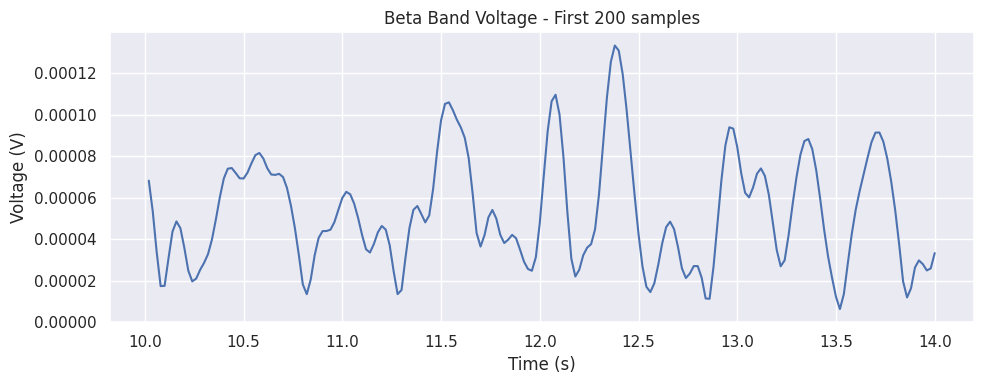

In [5]:
es = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"]

# Caution: loading subsets due to size and network streaming considerations
data = es.data[:200]
timestamps = es.timestamps[:200]

plt.figure(figsize=(10, 4))
plt.plot(timestamps, data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Beta Band Voltage - First 200 samples')
plt.tight_layout()
plt.show()

The above plot displays oscillations in the beta frequency range (~13–30 Hz).

## (Optional) Power Spectral Density
Here we compute the PSD on the small data segment to illustrate frequency content. Larger data segments may be needed for detailed spectral analyses.

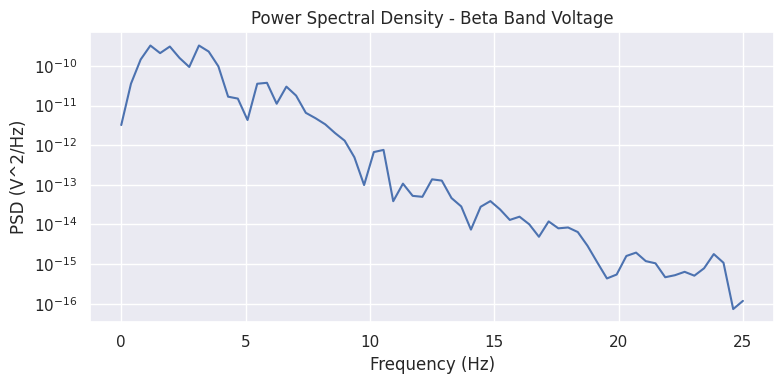

In [6]:
dt = np.diff(timestamps)
fs = 1.0 / np.median(dt)

freqs, psd = welch(data, fs=fs, nperseg=min(128, len(data)))

plt.figure(figsize=(8, 4))
plt.semilogy(freqs, psd)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.title('Power Spectral Density - Beta Band Voltage')
plt.tight_layout()
plt.show()

While characteristic beta-band power may not be clearly distinguishable at this small segment, full data analyses can be performed similarly.

## Exploring Metadata & Electrode Info
The NWB file also includes detailed electrode metadata, accessible like this:

In [7]:
# List electrode groups and associated info
for name, eg in nwb.electrode_groups.items():
    print(f"Electrode Group: {name}")
    print(f"  Location: {eg.location}")
    print(f"  Description: {eg.description}")
    print(f"  Device: {eg.device.name}")

print("Available electrode table columns:", nwb.electrodes.colnames)

Electrode Group: shank0
  Location: Simulated Cortico-basal-ganglia network of brain
  Description: Simulated electrode group for shank 0
  Device: NEURON_Simulator
Electrode Group: shank1
  Location: Simulated Cortico-basal-ganglia network of brain
  Description: Simulated electrode group for shank 1
  Device: NEURON_Simulator
Electrode Group: shank2
  Location: Simulated Cortico-basal-ganglia network of brain
  Description: Simulated electrode group for shank 2
  Device: NEURON_Simulator
Electrode Group: shank3
  Location: Simulated Cortico-basal-ganglia network of brain
  Description: Simulated electrode group for shank 3
  Device: NEURON_Simulator
Available electrode table columns: ('location', 'group', 'group_name', 'label')


## Summary
This notebook demonstrated:
- Connecting to the DANDI Archive via API
- Listing Dandiset assets
- Loading NWB neurophysiology data remotely
- Visualizing beta band local field potentials
- Basic spectral and metadata exploration

For further studies consider:
- Loading and analyzing additional or larger data segments
- Investigating other processing modules
- Filtering, spike train extraction, or connectivity analyses (beyond scope here)

**End of Notebook**